## 1. Data Preprocessing:
- Handle missing and invalid values in the dataset.
- Encode categorical variables appropriately.
- Scale and normalize numeric features for uniformity.
- Detect and address outliers to improve model stability.

Saving bank.csv to bank.csv

--- Dataset Overview ---
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may       261         1     -1         0  unknown      no  
1  unknown    5   may       151         1     -1         0  unknown      no  
2  unknown    5   may        76         1     -1         0  unknown      no  
3  unknown    5   may        92         1     -1         0  unknown      no  
4  unknown    5   may       198         1     -1         0  unknown      no  

--- Dataset Info ---
<class 'pan

<ipython-input-1-408d6aba8208>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-1-408d6aba8208>:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

--- Encoded DataFrame Overview ---
   age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0   58     2143    5       261         1     -1         0            False   
1   44       29    5       151         1     -1         0            False   
2   33        2    5        76         1     -1         0            False   
3   47     1506    5        92         1     -1         0             True   
4   33        1    5       198         1     -1         0            False   

   job_entrepreneur  job_housemaid  ...  month_jun  month_mar  month_may  \
0             False          False  ...      False      False       True   
1             False          False  ...      False      False       True   

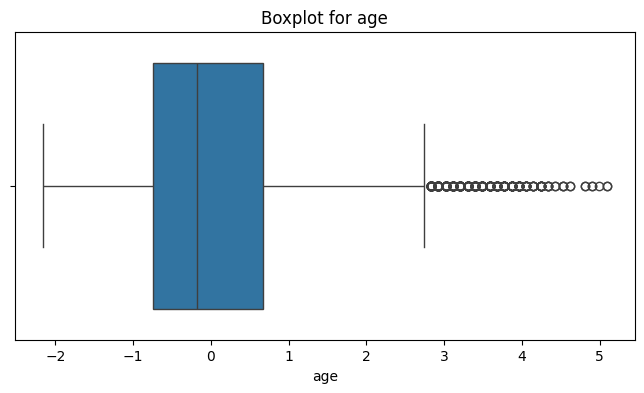

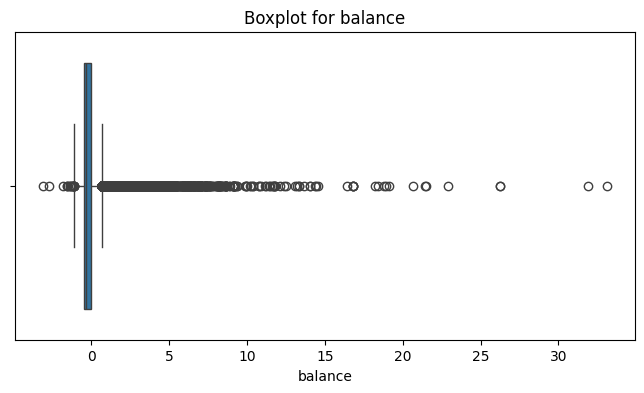

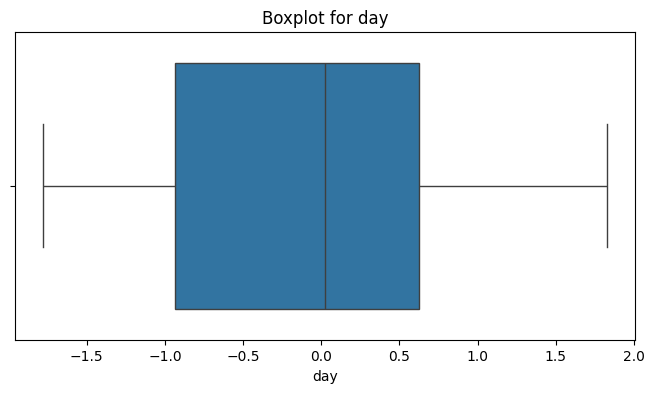

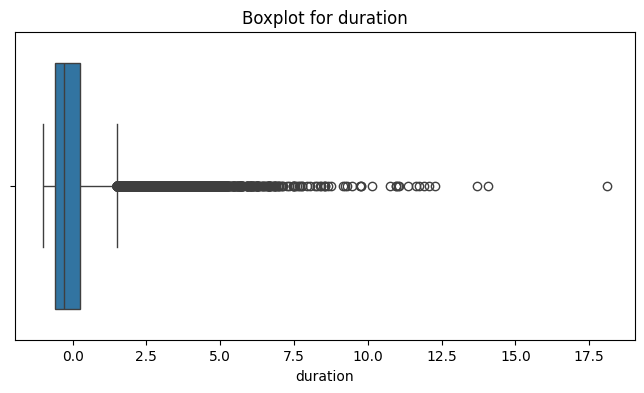

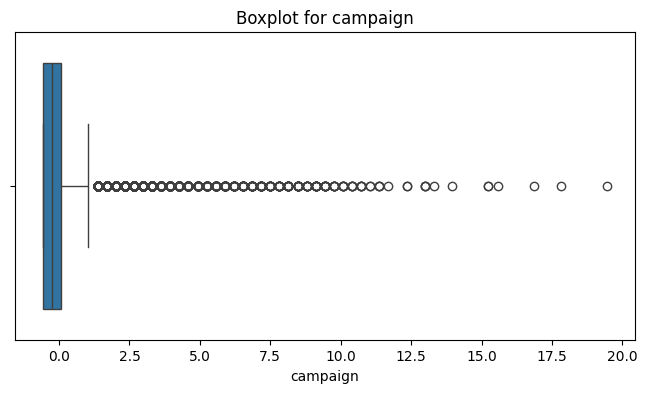

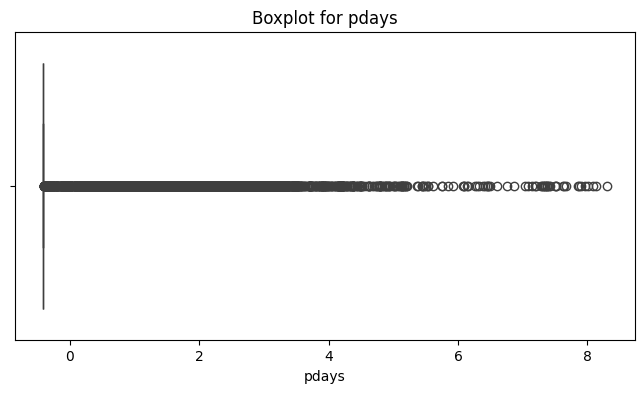

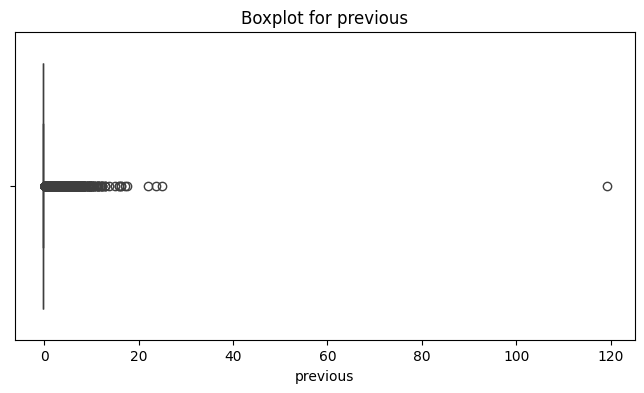


--- Shape After Removing Outliers ---
(28069, 43)

Preprocessed dataset saved as 'preprocessed_dataset.csv'


In [1]:
# Step 1: Load the Dataset


# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset (uploaded file)
from google.colab import files
uploaded = files.upload()

# Read the dataset into a DataFrame
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Display the first few rows of the dataset
print("\n--- Dataset Overview ---")
print(df.head())

# Check dataset information
print("\n--- Dataset Info ---")
print(df.info())

# Check for missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())


# Step 2: Handle Missing and Invalid Values


# Option 1: Fill missing numeric values with the median
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    df[col].fillna(df[col].median(), inplace=True)

# Option 2: Fill missing categorical values with the mode
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Validate that no missing values remain
print("\n--- Missing Values After Handling ---")
print(df.isnull().sum())


# Step 3: Encode Categorical Variables


# Convert categorical columns to numeric using One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display a summary of the encoded DataFrame
print("\n--- Encoded DataFrame Overview ---")
print(df_encoded.head())


# Step 4: Scale and Normalize Numeric Features


from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardize numeric features (mean=0, std=1)
scaler = StandardScaler()
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

# Display scaled numeric features
print("\n--- Scaled Numeric Features ---")
print(df_encoded[numeric_columns].head())


# Step 5: Detect and Address Outliers


import matplotlib.pyplot as plt
import seaborn as sns

# Visualize numeric columns to detect outliers
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_encoded[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

# Remove outliers using the Interquartile Range (IQR) method
for col in numeric_columns:
    Q1 = df_encoded[col].quantile(0.25)
    Q3 = df_encoded[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out rows with outliers
    df_encoded = df_encoded[(df_encoded[col] >= lower_bound) & (df_encoded[col] <= upper_bound)]

# Display the shape of the DataFrame after removing outliers
print("\n--- Shape After Removing Outliers ---")
print(df_encoded.shape)


# Final Preprocessed Dataset


# Save the preprocessed dataset for the next steps
df_encoded.to_csv('preprocessed_dataset.csv', index=False)
print("\nPreprocessed dataset saved as 'preprocessed_dataset.csv'")


## 2. Exploratory Data Analysis (EDA):
- Perform descriptive statistics to understand the data distribution.
- Visualize relationships between features and the target variable.
- Analyze correlations and identify trends or anomalies in the data.




--- Dataset Overview ---
        age   balance       day  duration  campaign     pdays  previous  \
0  1.606965  0.256419 -1.298476  0.011016 -0.569351 -0.411453  -0.25194   
1  0.288529 -0.437895 -1.298476 -0.416127 -0.569351 -0.411453  -0.25194   
2 -0.747384 -0.446762 -1.298476 -0.707361 -0.569351 -0.411453  -0.25194   
3  0.571051  0.047205 -1.298476 -0.645231 -0.569351 -0.411453  -0.25194   
4 -0.747384 -0.447091 -1.298476 -0.233620 -0.569351 -0.411453  -0.25194   

   job_blue-collar  job_entrepreneur  job_housemaid  ...  month_jun  \
0            False             False          False  ...      False   
1            False             False          False  ...      False   
2            False              True          False  ...      False   
3             True             False          False  ...      False   
4            False             False          False  ...      False   

   month_mar  month_may  month_nov  month_oct  month_sep  poutcome_other  \
0      False       T

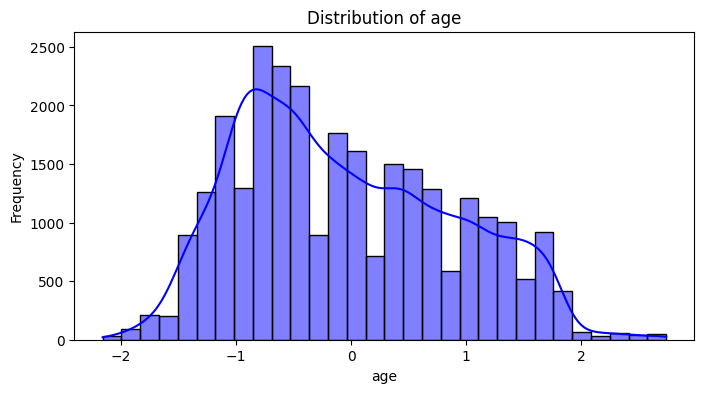

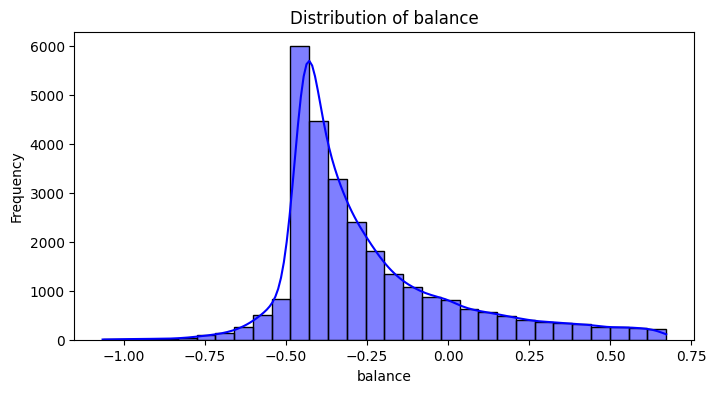

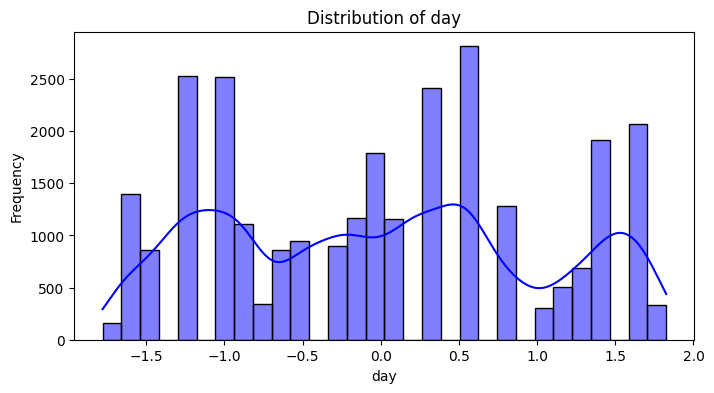

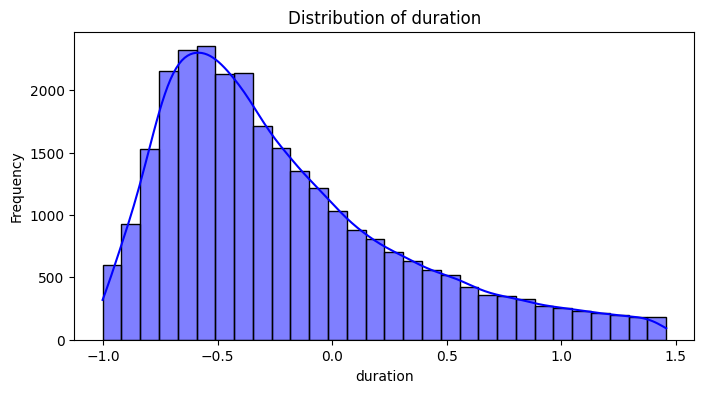

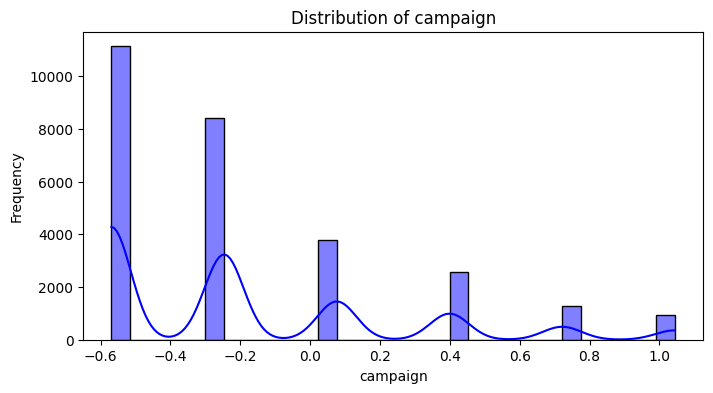

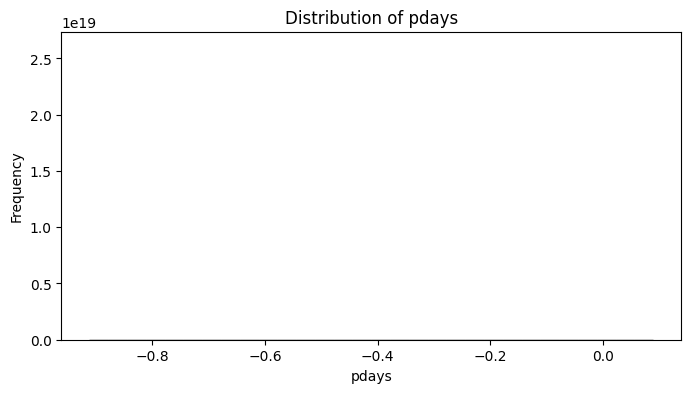

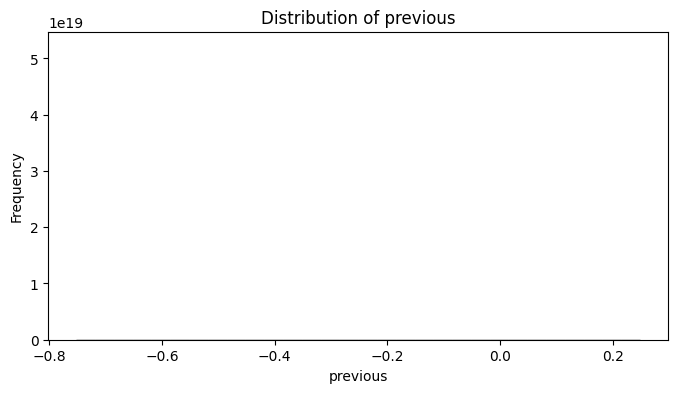

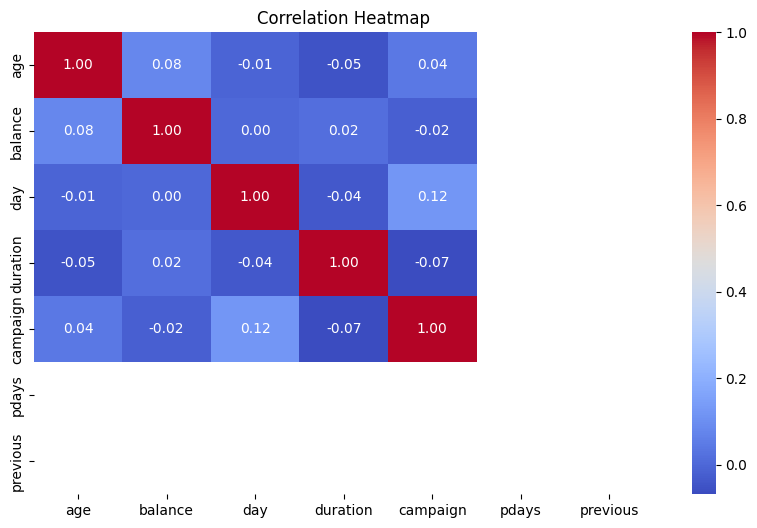


Target column not found. Update the 'target_column' variable with the correct name.



--- Key Insights ---
- Check the heatmap for highly correlated features and potential multicollinearity.
- Boxplots indicate how numeric features vary with the target variable.
- Pairplots reveal trends, clusters, or anomalies among features.


In [2]:

# Step 1: Load the Preprocessed Dataset


# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed dataset
df = pd.read_csv('preprocessed_dataset.csv')

# Display the first few rows of the dataset
print("\n--- Dataset Overview ---")
print(df.head())


# Step 2: Perform Descriptive Statistics


# Summary statistics for numeric features
print("\n--- Descriptive Statistics (Numeric Features) ---")
print(df.describe())

# Distribution of categorical features (if any remain)
categorical_columns = df.select_dtypes(include=['object']).columns
if len(categorical_columns) > 0:
    for col in categorical_columns:
        print(f"\n--- Value Counts for {col} ---")
        print(df[col].value_counts())


# Step 3: Visualize Data Distribution


# Visualize the distribution of numeric features
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


# Step 4: Analyze Correlations


# Correlation heatmap for numeric features
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


# Step 5: Relationship Between Features and Target


# Assuming 'target' is the target column (replace with actual target column name)
target_column = 'target'  # Replace with your actual target variable name
if target_column in df.columns:
    for col in numeric_columns:
        if col != target_column:
            plt.figure(figsize=(8, 4))
            sns.boxplot(x=target_column, y=col, data=df)
            plt.title(f"Relationship Between {target_column} and {col}")
            plt.xlabel(target_column)
            plt.ylabel(col)
            plt.show()
else:
    print("\nTarget column not found. Update the 'target_column' variable with the correct name.")


# Step 6: Identify Trends or Anomalies


# Pairplot to analyze trends and relationships
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()


# Step 7: Highlight Key Insights


# Summary of insights from visualizations and statistics
print("\n--- Key Insights ---")
print("- Check the heatmap for highly correlated features and potential multicollinearity.")
print("- Boxplots indicate how numeric features vary with the target variable.")
print("- Pairplots reveal trends, clusters, or anomalies among features.")


## 3. Model Building:
- Train multiple machine learning models using the preprocessed data.
- Evaluate the suitability of various models for the task.

In [9]:
df = pd.read_csv('preprocessed_dataset.csv')

# Display column names to identify the target column
print("Columns in the dataset:", df.columns)


Columns in the dataset: Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'deposit_yes'],
      dtype='object')


In [14]:
# Step 1: Import Required Libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Step 2: Load and Inspect Data
df = pd.read_csv('preprocessed_dataset.csv')

# Display column names to identify the target column
print("Columns in the dataset:", df.columns)


target_column = 'job_student'

# Step 3: Initialize Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Naive Bayes": GaussianNB()
}

# Step 4: Train and Evaluate Models
results = []

# Check if the target column exists in the DataFrame
if target_column in df.columns:
    # Split data into training and testing sets
    X = df.drop(columns=[target_column])  # Features
    y = df[target_column]  # Target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        print(f"Training {model_name}...")

        # Train the model
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Evaluate performance
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted')  # Use weighted average for multi-class
        rec = recall_score(y_test, y_pred, average='weighted')  # Use weighted average for multi-class
        f1 = f1_score(y_test, y_pred, average='weighted')  # Use weighted average for multi-class
        cm = confusion_matrix(y_test, y_pred)

        # Store results
        results.append({
            "Model": model_name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1 Score": f1,
            "Confusion Matrix": cm
        })

        print(f"{model_name} results:")
        print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")
        print(f"Confusion Matrix:\n{cm}\n")

    # Step 5: Summarize Results
    results_df = pd.DataFrame(results)
    print("Model Evaluation Summary:")
    print(results_df)

    # Step 6: Save Results for Further Analysis
    results_df.to_csv("model_evaluation_results.csv", index=False)
else:
    print(f"Error: Target column '{target_column}' not found in the dataset.")

Columns in the dataset: Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'deposit_yes'],
      dtype='object')
Training Logistic Regression...
Logistic Regression results:
Accuracy: 0.9882, Precision: 0.9872, Recall: 0.9882, F1 Score: 0.9875
Confusion Matrix:
[[5492   22]
 [  44   56]]

Training Random Forest...
Random For

## 4. Model Evaluation:
- Compute and plot evaluation metrics for all models, such as accuracy, precision, recall, F1-score, and AUC-ROC.
- Compare the performance of models across multiple metrics.

Evaluating Logistic Regression...
Logistic Regression - Accuracy: 0.9882, Precision: 0.7179, Recall: 0.5600, F1 Score: 0.6292, AUC-ROC: 0.9914780558578165
Evaluating Random Forest...
Random Forest - Accuracy: 0.9857, Precision: 0.6923, Recall: 0.3600, F1 Score: 0.4737, AUC-ROC: 0.9532607907145447
Evaluating Gradient Boosting...
Gradient Boosting - Accuracy: 0.9881, Precision: 0.7260, Recall: 0.5300, F1 Score: 0.6127, AUC-ROC: 0.9820230322814654
Evaluating Support Vector Machine...
Support Vector Machine - Accuracy: 0.9888, Precision: 0.8364, Recall: 0.4600, F1 Score: 0.5935, AUC-ROC: 0.9876532462821909
Evaluating Naive Bayes...
Naive Bayes - Accuracy: 0.8828, Precision: 0.1319, Recall: 1.0000, F1 Score: 0.2331, AUC-ROC: 0.9443235400797969


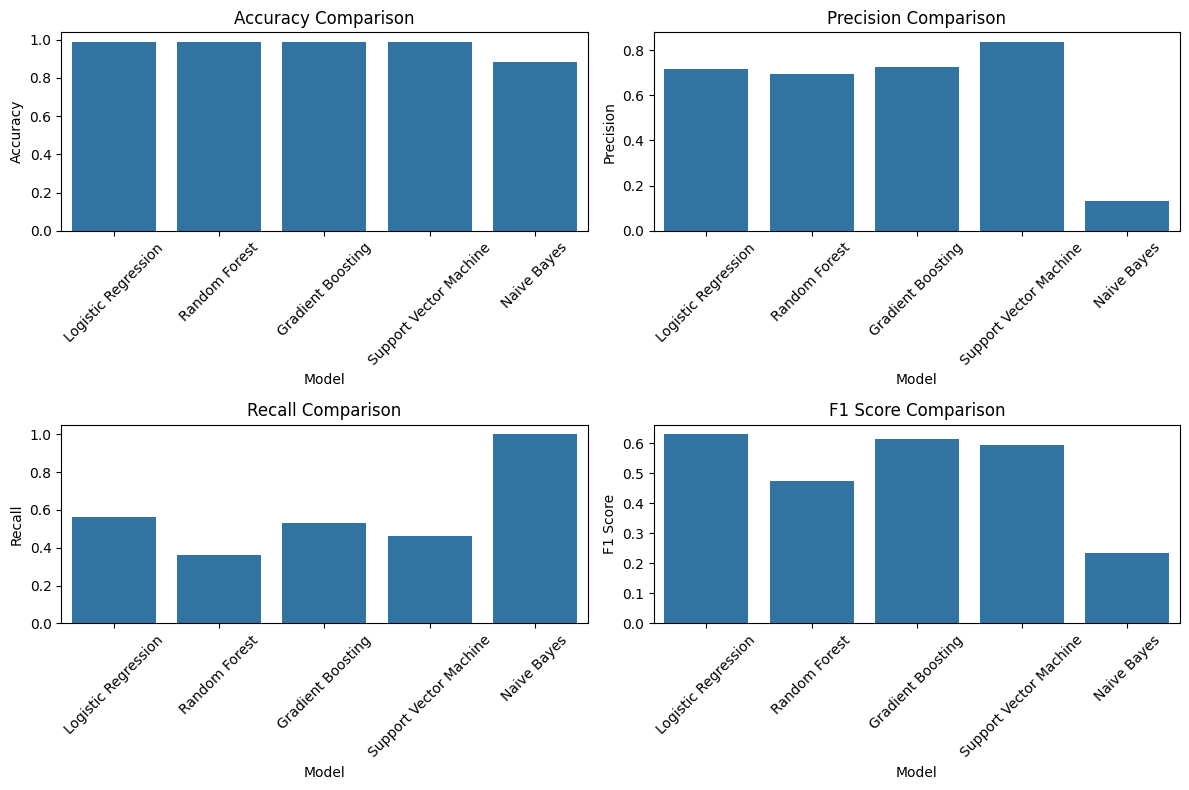

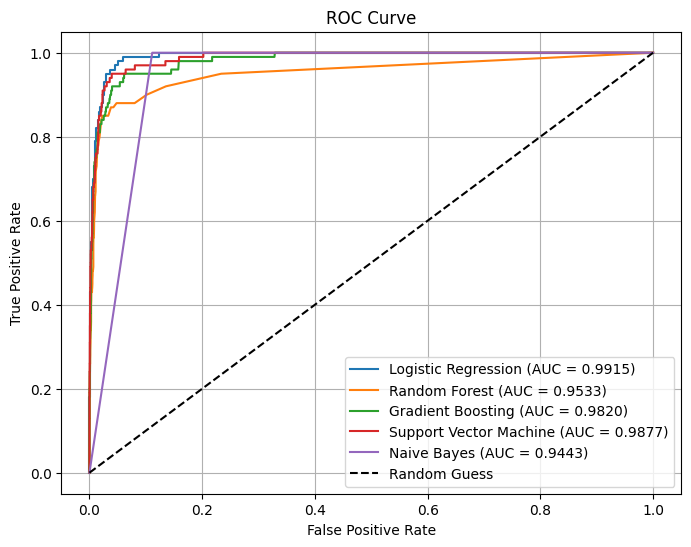

Evaluation metrics saved to 'model_evaluation_metrics.csv'.


In [15]:
# Step 1: Import Required Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

# Step 2: Initialize DataFrame for Metrics
evaluation_metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
    "AUC-ROC": []
}

# Step 3: Evaluate Each Model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='binary')
    rec = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    auc_roc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else "N/A"

    # Append metrics to DataFrame
    evaluation_metrics["Model"].append(model_name)
    evaluation_metrics["Accuracy"].append(acc)
    evaluation_metrics["Precision"].append(prec)
    evaluation_metrics["Recall"].append(rec)
    evaluation_metrics["F1 Score"].append(f1)
    evaluation_metrics["AUC-ROC"].append(auc_roc)

    print(f"{model_name} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}, AUC-ROC: {auc_roc}")

# Convert metrics to a DataFrame
import pandas as pd
evaluation_df = pd.DataFrame(evaluation_metrics)

# Step 4: Plot Metrics for Comparison
plt.figure(figsize=(12, 8))

# Subplot 1: Bar plot of Accuracy, Precision, Recall, and F1-Score
metric_names = ["Accuracy", "Precision", "Recall", "F1 Score"]
for i, metric in enumerate(metric_names):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x="Model", y=metric, data=evaluation_df)
    plt.title(f"{metric} Comparison")
    plt.xticks(rotation=45)
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.tight_layout()

# Subplot 2: ROC Curve for AUC-ROC
plt.figure(figsize=(8, 6))
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score(y_test, y_pred_prob):.4f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()

# Display the plots
plt.show()

# Step 5: Save Results
evaluation_df.to_csv("model_evaluation_metrics.csv", index=False)
print("Evaluation metrics saved to 'model_evaluation_metrics.csv'.")


## 5. Hyperparameter Tuning:
- Optimize hyperparameters for each model using systematic search methods.
- Identify the best configuration for improved performance.

In [16]:
# Step 1: Import Required Libraries
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Step 2: Define Hyperparameter Grids for Each Model
param_grids = {
    "Logistic Regression": {
        "penalty": ["l1", "l2", "elasticnet", None],
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["liblinear", "saga"]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 10],
        "subsample": [0.8, 1.0]
    }
}

# Step 3: Perform Hyperparameter Tuning
best_models = {}
for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")

    # Select the hyperparameter grid for the current model
    param_grid = param_grids.get(model_name, None)
    if not param_grid:
        print(f"No hyperparameter grid defined for {model_name}. Skipping.")
        continue

    # Perform Grid Search
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring="accuracy",  # Use accuracy as the evaluation metric
        cv=5,  # 5-fold cross-validation
        verbose=2,
        n_jobs=-1
    )

    # Fit the model with GridSearch
    grid_search.fit(X_train, y_train)

    # Store the best model
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best hyperparameters for {model_name}: {grid_search.best_params_}")
    print(f"Best accuracy for {model_name}: {grid_search.best_score_:.4f}")

# Step 4: Save Best Models and Parameters
import pickle

for model_name, model in best_models.items():
    with open(f"{model_name}_best_model.pkl", "wb") as file:
        pickle.dump(model, file)
    print(f"Saved best {model_name} model to {model_name}_best_model.pkl")


Tuning hyperparameters for Logistic Regression...
Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
75 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve

Best hyperparameters for Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy for Logistic Regression: 0.9888
Tuning hyperparameters for Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy for Random Forest: 0.9862
Tuning hyperparameters for Gradient Boosting...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best hyperparameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best accuracy for Gradient Boosting: 0.9882
Tuning hyperparameters for Support Vector Machine...
No hyperparameter grid defined for Support Vector Machine. Skipping.
Tuning hyperparameters for Naive Bayes...
No hyperparameter grid defined for Naive Bayes. Skipping.
Saved best Logistic Regression model to Logistic Regression_best_model.pkl
Saved best 

## 6. Retrain Models:
- Retrain all models using the optimal hyperparameters on the training data.
- Validate the models on unseen data to ensure robustness.

In [17]:
# Step 1: Import Required Libraries
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Load Best Models (Optional if already in memory)
import pickle

best_models = {}
model_files = ["Logistic Regression_best_model.pkl", "Random Forest_best_model.pkl", "Gradient Boosting_best_model.pkl"]

for model_file in model_files:
    model_name = model_file.split("_best_model.pkl")[0]
    with open(model_file, "rb") as file:
        best_models[model_name] = pickle.load(file)
    print(f"Loaded {model_name} model from {model_file}")

# Step 3: Retrain Models with Optimal Hyperparameters
retrained_models = {}
for model_name, model in best_models.items():
    print(f"Retraining {model_name}...")

    # Retrain the model on the entire training set
    model.fit(X_train, y_train)
    retrained_models[model_name] = model

# Step 4: Validate Models on Unseen Data (Test Set)
for model_name, model in retrained_models.items():
    print(f"\nValidating {model_name} on test data...")

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    print(f"Accuracy for {model_name}: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix for {model_name}:\n{confusion_matrix(y_test, y_pred)}")


Loaded Logistic Regression model from Logistic Regression_best_model.pkl
Loaded Random Forest model from Random Forest_best_model.pkl
Loaded Gradient Boosting model from Gradient Boosting_best_model.pkl
Retraining Logistic Regression...
Retraining Random Forest...
Retraining Gradient Boosting...

Validating Logistic Regression on test data...
Accuracy for Logistic Regression: 0.9893
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99      5514
        True       0.74      0.62      0.67       100

    accuracy                           0.99      5614
   macro avg       0.87      0.81      0.83      5614
weighted avg       0.99      0.99      0.99      5614

Confusion Matrix for Logistic Regression:
[[5492   22]
 [  38   62]]

Validating Random Forest on test data...
Accuracy for Random Forest: 0.9854
Classification Report for Random Forest:
              precision    recall  f1-score   support

## 7. Final Performance and Cross-Validation:
- Evaluate the final performance of each model using cross-validation scores.
- Compare results to select the best-performing model.

In [18]:
# Step 1: Import Required Libraries
from sklearn.model_selection import cross_val_score
import numpy as np

# Step 2: Perform Cross-Validation for Each Model
cv_results = {}

print("Performing Cross-Validation...")
for model_name, model in retrained_models.items():
    print(f"\nEvaluating {model_name} with 5-fold Cross-Validation...")

    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    # Store results
    cv_results[model_name] = {
        "mean_score": np.mean(cv_scores),
        "std_dev": np.std(cv_scores),
        "all_scores": cv_scores
    }

    # Print results
    print(f"Cross-Validation Accuracy Scores for {model_name}: {cv_scores}")
    print(f"Mean Accuracy for {model_name}: {np.mean(cv_scores):.4f}")
    print(f"Standard Deviation for {model_name}: {np.std(cv_scores):.4f}")

# Step 3: Compare Models and Select the Best-Performing Model
print("\nSummary of Cross-Validation Results:")
for model_name, result in cv_results.items():
    print(f"{model_name}: Mean Accuracy = {result['mean_score']:.4f}, Std Dev = {result['std_dev']:.4f}")

# Step 4: Select Best Model
best_model_name = max


Performing Cross-Validation...

Evaluating Logistic Regression with 5-fold Cross-Validation...
Cross-Validation Accuracy Scores for Logistic Regression: [0.98953462 0.98842129 0.98886662 0.98953462 0.98753062]
Mean Accuracy for Logistic Regression: 0.9888
Standard Deviation for Logistic Regression: 0.0008

Evaluating Random Forest with 5-fold Cross-Validation...
Cross-Validation Accuracy Scores for Random Forest: [0.98663995 0.98530394 0.98508127 0.98708528 0.98753062]
Mean Accuracy for Random Forest: 0.9863
Standard Deviation for Random Forest: 0.0010

Evaluating Gradient Boosting with 5-fold Cross-Validation...
Cross-Validation Accuracy Scores for Gradient Boosting: [0.98886662 0.98842129 0.98708528 0.98775328 0.98842129]
Mean Accuracy for Gradient Boosting: 0.9881
Standard Deviation for Gradient Boosting: 0.0006

Summary of Cross-Validation Results:
Logistic Regression: Mean Accuracy = 0.9888, Std Dev = 0.0008
Random Forest: Mean Accuracy = 0.9863, Std Dev = 0.0010
Gradient Boosting

## 8. Suggestions:
- Provide recommendations based on the model insights and analysis.
- Suggest actionable steps to improve outcomes or address any gaps identified during the project.



Analyzing Feature Importance...


<ipython-input-19-d5d7b70c9ba9>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importance.values, y=sorted_importance.index, palette="viridis")


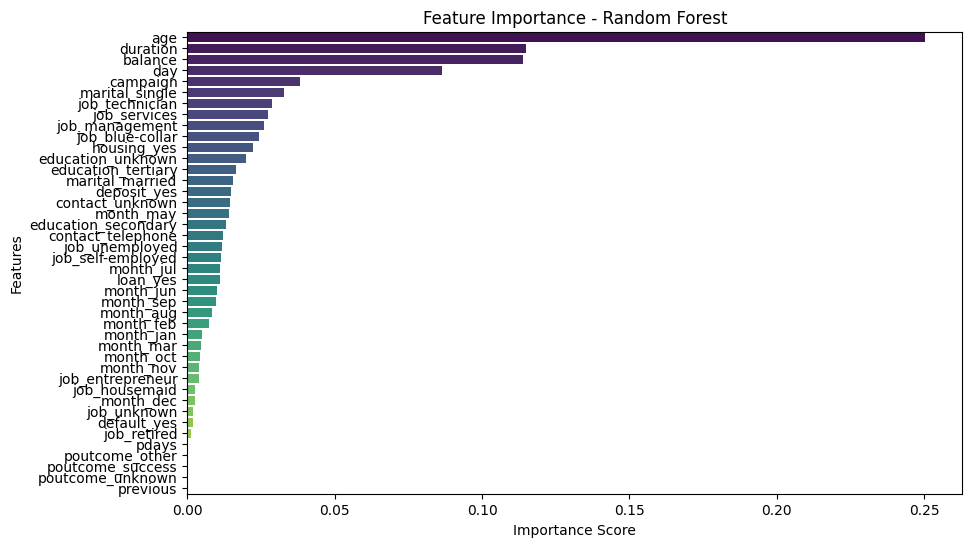


Key Features Identified by Random Forest:
age         0.250415
duration    0.114855
balance     0.113947
day         0.086498
campaign    0.038234
dtype: float64

Recommendation: Focus on improving the quality of the top features identified. Consider collecting more data for these features or analyzing their relationship with the target variable.

Checking Class Distribution...
Class Distribution in Training Data:
job_student
False    0.980806
True     0.019194
Name: proportion, dtype: float64

Recommendation: There is a class imbalance in the dataset. Consider applying techniques like oversampling (e.g., SMOTE), undersampling, or using class-weighted models to improve predictions.

Analyzing Model Metrics for Suggestions...
Logistic Regression: Mean Accuracy = 0.9888, Std Dev = 0.0008
Random Forest: Mean Accuracy = 0.9863, Std Dev = 0.0010
Gradient Boosting: Mean Accuracy = 0.9881, Std Dev = 0.0006

General Recommendations:
1. Focus on improving the data quality by addressing outlier

In [19]:
# Step 1: Import Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 2: Analyze Feature Importance for Tree-Based Models (if applicable)
print("\nAnalyzing Feature Importance...")
if "Random Forest" in retrained_models:
    # Extract feature importance from Random Forest
    rf_model = retrained_models["Random Forest"]
    feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
    sorted_importance = feature_importance.sort_values(ascending=False)

    # Plot Feature Importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x=sorted_importance.values, y=sorted_importance.index, palette="viridis")
    plt.title("Feature Importance - Random Forest")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.show()

    # Recommendations based on feature importance
    print("\nKey Features Identified by Random Forest:")
    print(sorted_importance.head(5))
    print("\nRecommendation: Focus on improving the quality of the top features identified. Consider collecting more data for these features or analyzing their relationship with the target variable.")

# Step 3: Identify Class Imbalance (if applicable)
print("\nChecking Class Distribution...")
class_distribution = y_train.value_counts(normalize=True)
print("Class Distribution in Training Data:")
print(class_distribution)

if class_distribution.min() < 0.2:
    print("\nRecommendation: There is a class imbalance in the dataset. Consider applying techniques like oversampling (e.g., SMOTE), undersampling, or using class-weighted models to improve predictions.")

# Step 4: Suggest Model Improvements Based on Metrics
print("\nAnalyzing Model Metrics for Suggestions...")
for model_name, result in cv_results.items():
    mean_score = result["mean_score"]
    std_dev = result["std_dev"]
    print(f"{model_name}: Mean Accuracy = {mean_score:.4f}, Std Dev = {std_dev:.4f}")
    if std_dev > 0.05:
        print(f"Recommendation for {model_name}: High variability observed in cross-validation scores. Consider optimizing hyperparameters further or using more robust validation techniques.")

# Step 5: General Recommendations
print("\nGeneral Recommendations:")
print("1. Focus on improving the data quality by addressing outliers and potential missing values.")
print("2. Explore additional data sources to enrich the feature set and improve model performance.")
print("3. Use Explainable AI (e.g., SHAP, LIME) to better understand model predictions and build trust with stakeholders.")
print("4. Deploy the best-performing model in a real-world scenario and monitor its performance on unseen data.")
